In [1]:
# cd C:\Users\mpoli\Desktop\Git\Deeplearning\Pandas_data_analysis
# jupyter nbconvert --to script wine.ipynb

import urllib.request as req # 웹에서 다운로드 할 때
import matplotlib.pyplot as plt # 그래프
from sklearn.cluster import KMeans # K-평균 알고리즘
from sklearn.preprocessing import StandardScaler # 데이터 Nomalization
from sklearn.decomposition import PCA
import pandas as pd
import os 

In [2]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
DATA_PATH = os.path.join('data') # 데이터 저장 폴더
ColumnList = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] # wine 성분 데이터 ColumnList

In [3]:
def fetch_wine_data(): # data 폴더와 wine의 데이터 csv 파일 생성
    if not os.path.isdir(DATA_PATH):
        os.makedirs(DATA_PATH)
    csv_path = os.path.join(DATA_PATH,'wine.csv')
    if not os.path.isfile(csv_path):
        req.urlretrieve(DOWNLOAD_ROOT, csv_path)

def load_wine_data(): # wine data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'wine.csv')
    return pd.read_csv(csv_path, names=ColumnList)

In [32]:
fetch_wine_data()
wine = load_wine_data()
wine.groupby(['Class']).describe()

Alcohol                                                             \
        count       mean       std    min     25%     50%     75%    max   
Class                                                                      
1        59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83   
2        71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86   
3        48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34   

      Malic acid            ... OD280/OD315 of diluted wines       Proline  \
           count      mean  ...                          75%   max   count   
Class                       ...                                              
1           59.0  2.010678  ...                         3.42  4.00    59.0   
2           71.0  1.932676  ...                         3.16  3.69    71.0   
3           48.0  3.333750  ...                         1.82  2.47    48.0   

                                                                      
              mean         std    min    25%     50%     75%     max  
Class                                                                 
1      1115.711864  221.520767  680.0  987.5  1095.0  1280.0  1680.0  
2       519.507042  157.211220  278.0  406.5   495.0   625.0   985.0  
3       629.895833  115.097043  415.0  545.0   627.5   695.0   880.0  

[3 rows x 104 columns]

In [35]:
scaler = StandardScaler()
result = scaler.fit_transform(feature)
data_scaled = pd.DataFrame(result, columns=feature.columns)
data_scaled

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [37]:
pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)
result
result = pd.DataFrame(result, columns=['x','y'])
new_wine = pd.concat([result, wine['Class']], axis=1)
new_wine

,x,y,Class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,3
174,-2.601956,-1.757229,3
175,-2.677839,-2.760899,3
176,-2.387017,-2.297347,3


In [40]:
model = KMeans(n_clusters=3, algorithm='auto') # 3개를 cluster 데이터로 군집화 할 것
model.fit(result)
predict = pd.DataFrame(model.predict(result)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([result,predict],axis=1) # 두 DataFrame을 합침
r

,x,y,predict
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


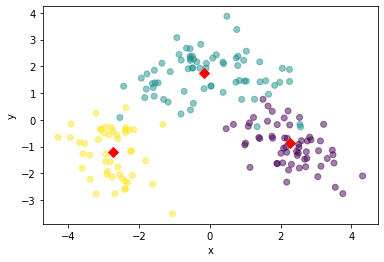

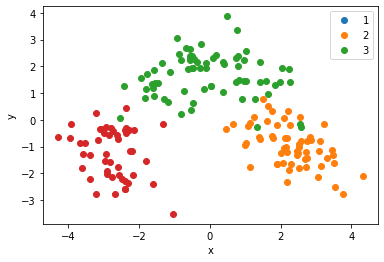

In [44]:
plt.scatter(new_wine['x'],new_wine['y'],c=new_wine['Class'],alpha=0.5)
centers = pd.DataFrame(model.cluster_centers_,columns=['x','y'])
center_x = centers['x']
center_y = centers['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

for i in range (0,4,1):
    wineList = new_wine[new_wine['Class']==i]
    plt.plot(wineList['x'],wineList['y'], 'o')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(wine['Class'].unique(), loc='best')

In [46]:
df=pd.DataFrame({'predict':predict['predict'],'Class':wine['Class']})
ct = pd.crosstab(df['predict'], df['Class'])
ct

Class,1,2,3
predict,,,
0,0,65,0
1,59,5,0
2,0,1,48


100% ,100%, 92% 정도의 확률을 볼 수 있다.